In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import plotly.express as px
import pandasql as ps
from  matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, tree, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_table
import plotly.graph_objs as go
from sklearn import datasets
from sklearn import preprocessing
import dash_bootstrap_components as dbc
import base64

In [2]:
bank = pd.read_csv('bank.csv')

In [3]:
bank3= pd.read_csv('bank_full.csv')

In [4]:
bankfull = pd.read_csv('bank_full.csv', sep = ';')

In [5]:
bank = pd.read_csv('bank.csv', sep = ';')

In [6]:
bankfull

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

# Data Report

In [7]:
pandas_profiling.ProfileReport(bankfull)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data transformation

In [8]:
##Alterar valor pdays de -1 para 0

In [9]:
bankfull.loc[bankfull.pdays==-1, 'pdays'] = 0

In [10]:
##eliminar coluna default

In [11]:
#Remover colunas inuteis 
del bankfull['default']
del bankfull['contact']

In [12]:
lst = [bankfull]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [13]:
#Remover linhas cuja duração é inferior a 5 segundos
condition2 = (bankfull['duration']<5/60)
bankfull = bankfull.drop(bankfull[condition2].index, axis = 0, inplace = False)

In [14]:
##Resposta à campanha em binário (0 se não aderiu e 1 se aderiu)
def convert(bankfull, new_column, old_column):
    bankfull[new_column] = bankfull[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return bankfull[new_column].value_counts()

convert(bankfull, "response_binary", "y")

0    39919
1     5289
Name: response_binary, dtype: int64

In [15]:
bankfull['duration_minutes']=bankfull[['duration']]/60


In [16]:
bankfull.round({'duration_minutes': 2})

age           job   marital  education  balance housing loan  day  \
0       58    management   married   tertiary     2143     yes   no    5   
1       44    technician    single  secondary       29     yes   no    5   
2       33  entrepreneur   married  secondary        2     yes  yes    5   
3       47   blue-collar   married    unknown     1506     yes   no    5   
4       33       unknown    single    unknown        1      no   no    5   
...    ...           ...       ...        ...      ...     ...  ...  ...   
45206   51    technician   married   tertiary      825      no   no   17   
45207   71       retired  divorced    primary     1729      no   no   17   
45208   72       retired   married  secondary     5715      no   no   17   
45209   57   blue-collar   married  secondary      668      no   no   17   
45210   37  entrepreneur   married  secondary     2971      no   no   17   

      month  duration  campaign  pdays  previous poutcome    y  month_int  \
0       may       261         1      0         0  unknown   no        5.0   
1       may       151         1      0         0  unknown   no        5.0   
2       may        76         1      0         0  unknown   no        5.0   
3       may        92         1      0         0  unknown   no        5.0   
4       may       198         1      0         0  unknown   no        5.0   
...     ...       ...       ...    ...       ...      ...  ...        ...   
45206   nov       977         3      0         0  unknown  yes       11.0   
45207   nov       456         2      0         0  unknown  yes       11.0   
45208   nov      1127         5    184         3  success  yes       11.0   
45209   nov       508         4      0         0  unknown   no       11.0   
45210   nov       361         2    188        11    other   no       11.0   

       response_binary  duration_minutes  
0                    0              4.35  
1                    0              2.52  
2                    0              1.27  
3                    0              1.53  
4                    0              3.30  
...                ...               ...  
45206                1             16.28  
45207                1              7.60  
45208                1             18.78  
45209                0              8.47  
45210                0              6.02  

[45208 rows x 18 columns]

In [17]:
age_class=""
balance_class=""
pdays_class=""
campaign_class=""
housing_loan=""
bankfull['age_class']=age_class
bankfull['balance_class']=balance_class
bankfull['pdays_class']=pdays_class
bankfull['housing_loan']=housing_loan

In [18]:
bankfull.loc[(bankfull['age']>=18) & (bankfull['age']<=29), 'age_class'] = '18-29'
bankfull.loc[(bankfull['age']>=30) & (bankfull['age']<=34), 'age_class'] = '30-34'
bankfull.loc[(bankfull['age']>=35) & (bankfull['age']<=39), 'age_class'] = '35-39'
bankfull.loc[(bankfull['age']>=40) & (bankfull['age']<=44), 'age_class'] = '40-44'
bankfull.loc[(bankfull['age']>=45) & (bankfull['age']<=49), 'age_class'] = '45-49'
bankfull.loc[(bankfull['age']>=50) & (bankfull['age']<=59), 'age_class'] = '50-59'
bankfull.loc[bankfull['age']>=60, 'age_class'] = '+60'

In [19]:
##analise classe de idade

In [20]:
bankfull['age_class'].value_counts()

30-34    9739
50-59    8409
35-39    8348
40-44    6185
45-49    5470
18-29    5273
+60      1784
Name: age_class, dtype: int64

In [21]:
bankfull.loc[bankfull['balance']<0, 'balance_class'] = '-0'
bankfull.loc[(bankfull['balance']>=0) & (bankfull['balance']<500), 'balance_class'] = '0-499.99'
bankfull.loc[(bankfull['balance']>=500) & (bankfull['balance']<1000), 'balance_class'] = '500-999.99'
bankfull.loc[(bankfull['balance']>=1000) & (bankfull['balance']<3000), 'balance_class'] = '1000-2999.99'
bankfull.loc[(bankfull['balance']>=3000) & (bankfull['balance']<5000), 'balance_class'] = '3000-4999.99'
bankfull.loc[(bankfull['balance']>=5000) & (bankfull['balance']<7500), 'balance_class'] = '5000-7499.99'
bankfull.loc[bankfull['balance']>=7500, 'balance_class'] = '+7500'

In [22]:
##analise classe de saldo

In [23]:
bankfull['balance_class'].value_counts()

0-499.99        19869
1000-2999.99     9027
500-999.99       6932
-0               3766
3000-4999.99     2768
+7500            1451
5000-7499.99     1395
Name: balance_class, dtype: int64

In [24]:
##class pdays

In [25]:
bankfull.loc[bankfull['pdays']==0,'pdays_class'] = 'not contacted'
bankfull.loc[(bankfull['pdays']>0) & (bankfull['pdays']<=90), 'pdays_class'] = '1ºtrimestre'
bankfull.loc[(bankfull['pdays']>90) & (bankfull['pdays']<=180), 'pdays_class'] = '2ºtrimestre'
bankfull.loc[(bankfull['pdays']>180) & (bankfull['pdays']<=270), 'pdays_class'] = '3ºtrimestre'
bankfull.loc[(bankfull['pdays']>270) & (bankfull['pdays']<=360), 'pdays_class'] = '4ºtrimestre'
bankfull.loc[bankfull['pdays']>360, 'pdays_class'] = '+ 1 ano'

In [26]:
bankfull['pdays_class'].value_counts()

not contacted    36951
2ºtrimestre       2480
4ºtrimestre       2089
3ºtrimestre       2082
+ 1 ano            888
1ºtrimestre        718
Name: pdays_class, dtype: int64

In [27]:
bankfull.loc[bankfull['campaign']==1, 'campaign_class'] = '1 contacto'
bankfull.loc[bankfull['campaign']==2, 'campaign_class'] = '2 contactos'
bankfull.loc[bankfull['campaign']==3, 'campaign_class'] = '3 contactos'
bankfull.loc[bankfull['campaign']==4, 'campaign_class'] = '4 contactos'
bankfull.loc[bankfull['campaign']>4, 'campaign_class'] = '+4 contactos'

In [28]:
bankfull['campaign_class'].value_counts()

1 contacto      17544
2 contactos     12504
+4 contactos     6118
3 contactos      5521
4 contactos      3521
Name: campaign_class, dtype: int64

In [29]:
bankfull.loc[(bankfull['housing']=='yes') & (bankfull['loan']=='yes'), 'housing_loan'] = 'yes'
bankfull.loc[(bankfull['housing']=='no') & (bankfull['loan']=='yes'), 'housing_loan'] = 'no'
bankfull.loc[(bankfull['housing']=='yes') & (bankfull['loan']=='no'), 'housing_loan'] = 'no'
bankfull.loc[(bankfull['housing']=='no') & (bankfull['loan']=='no'), 'housing_loan'] = 'no'

# KPI´s

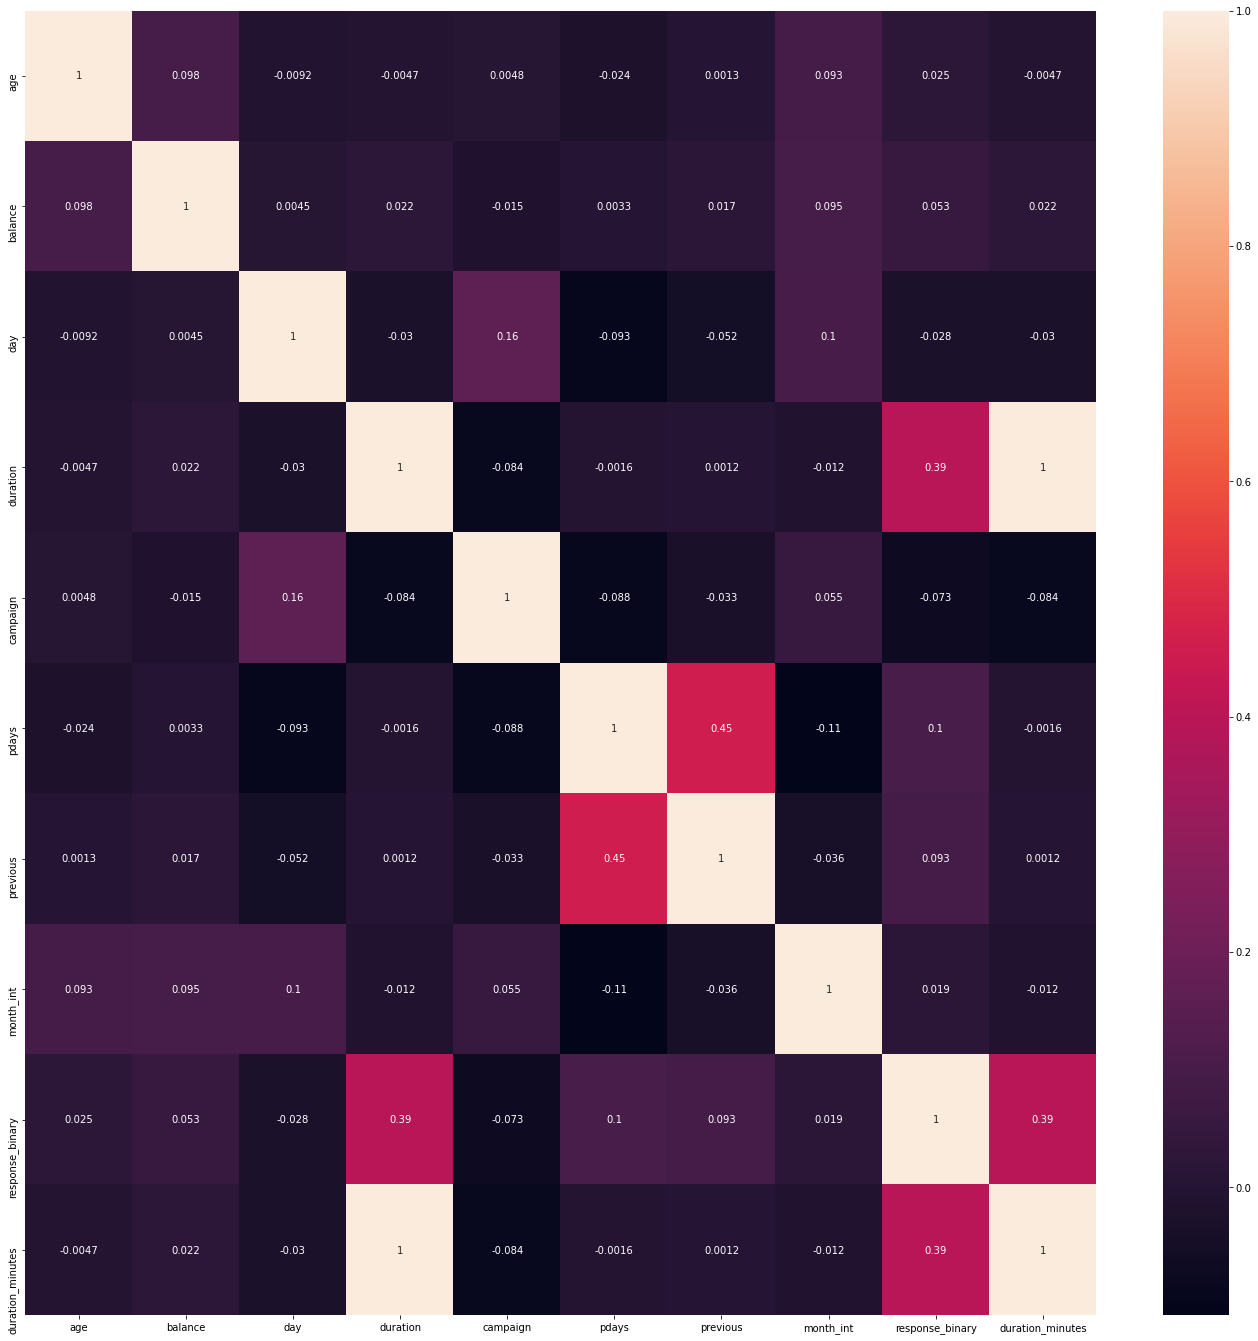

In [30]:
plt.subplots(figsize=(24,24))
sns.heatmap(bankfull.corr(), annot=True)
plt.show()

Text(0.5, 1.0, 'Percentagem de pessoas que aderiram à campanha por grau de ensino')

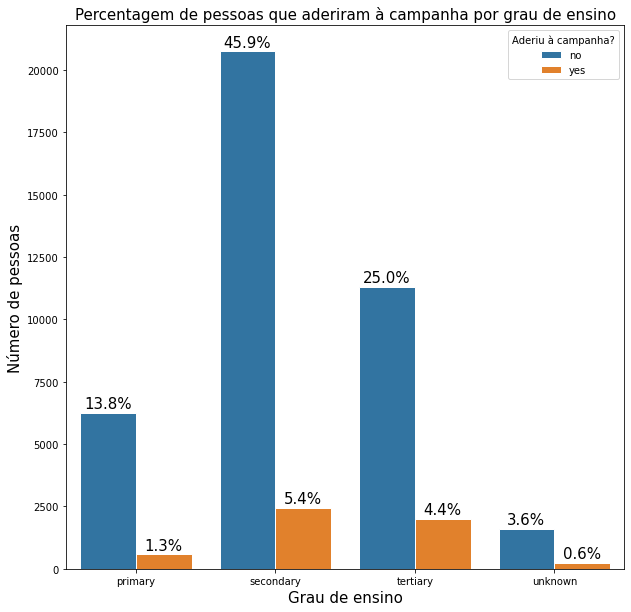

In [31]:
fig = plt.gcf()
bankfulllegnth=bankfull.shape[0]
splot=sns.countplot(x="education", hue="y", data=bankfull, edgecolor = 'w',order=['primary','secondary', 'tertiary', 'unknown'])
for p in splot.patches:
    splot.annotate(format((p.get_height() * 100)/bankfulllegnth, '.1f') + "%", 
                   (p.get_x() + p.get_width() / 2. , p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize=15)
  
fig.set_size_inches(10, 10)
plt.xlabel("Grau de ensino",fontsize=15)
plt.ylabel("Número de pessoas",fontsize=15)
splot.legend(fontsize=15)
splot.legend().set_title("Aderiu à campanha?")
splot.set_title('Percentagem de pessoas que aderiram à campanha por grau de ensino', fontsize=15)

<ipython-input-32-97a61e0f5b25>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_yticklabels(ylabels)


Text(0.5, 1.0, 'Percentagem de pessoas que aderiram à campanha por profissão')

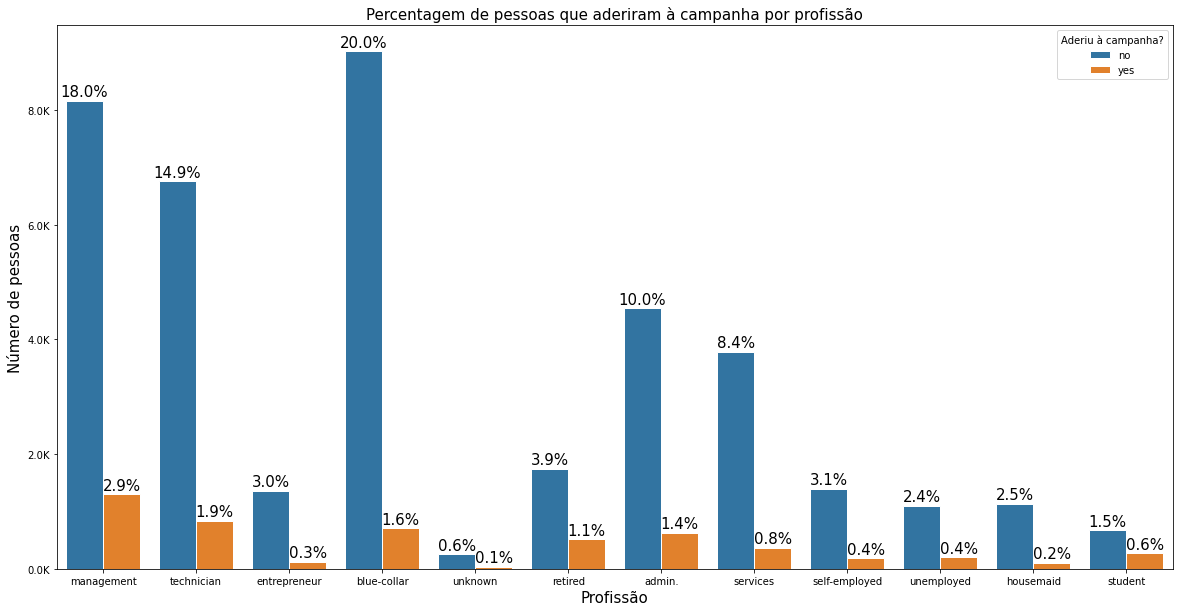

In [32]:
fig = plt.gcf()
bankfulllegnth=bankfull.shape[0]
splot=sns.countplot(x="job", hue="y", data=bankfull, edgecolor = 'w')
for p in splot.patches:
    splot.annotate(format((p.get_height() * 100)/bankfulllegnth, '.1f') + "%", 
                   (p.get_x() + p.get_width() / 2. , p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize=15)
ylabels = ['{:,.1f}'.format(x) + 'K' for x in splot.get_yticks()/1000]
splot.set_yticklabels(ylabels)
fig.set_size_inches(20, 10)
plt.xlabel("Profissão",fontsize=15)
plt.ylabel("Número de pessoas",fontsize=15)
splot.legend(fontsize=12)
splot.legend().set_title("Aderiu à campanha?")
splot.set_title('Percentagem de pessoas que aderiram à campanha por profissão', fontsize=15)

<ipython-input-33-d5aaf9c7bf7d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_yticklabels(ylabels)


Text(0.5, 1.0, 'Percentagem de pessoas que aderiram à campanha por estado civil')

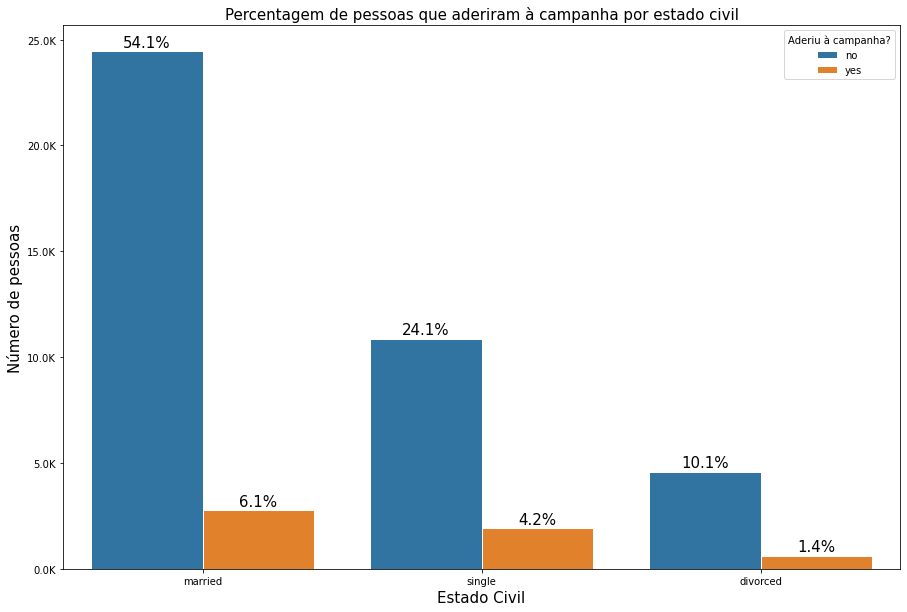

In [33]:
fig = plt.gcf()
bankfulllegnth=bankfull.shape[0]
splot=sns.countplot(x="marital", hue="y", data=bankfull, edgecolor = 'w')
for p in splot.patches:
    splot.annotate(format((p.get_height() * 100)/bankfulllegnth, '.1f') + "%", 
                   (p.get_x() + p.get_width() / 2. , p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize=15)
ylabels = ['{:,.1f}'.format(x) + 'K' for x in splot.get_yticks()/1000]
splot.set_yticklabels(ylabels)
fig.set_size_inches(15, 10)
plt.xlabel("Estado Civil",fontsize=15)
plt.ylabel("Número de pessoas",fontsize=15)
splot.legend(fontsize=12)
splot.legend().set_title("Aderiu à campanha?")
splot.set_title('Percentagem de pessoas que aderiram à campanha por estado civil', fontsize=15)

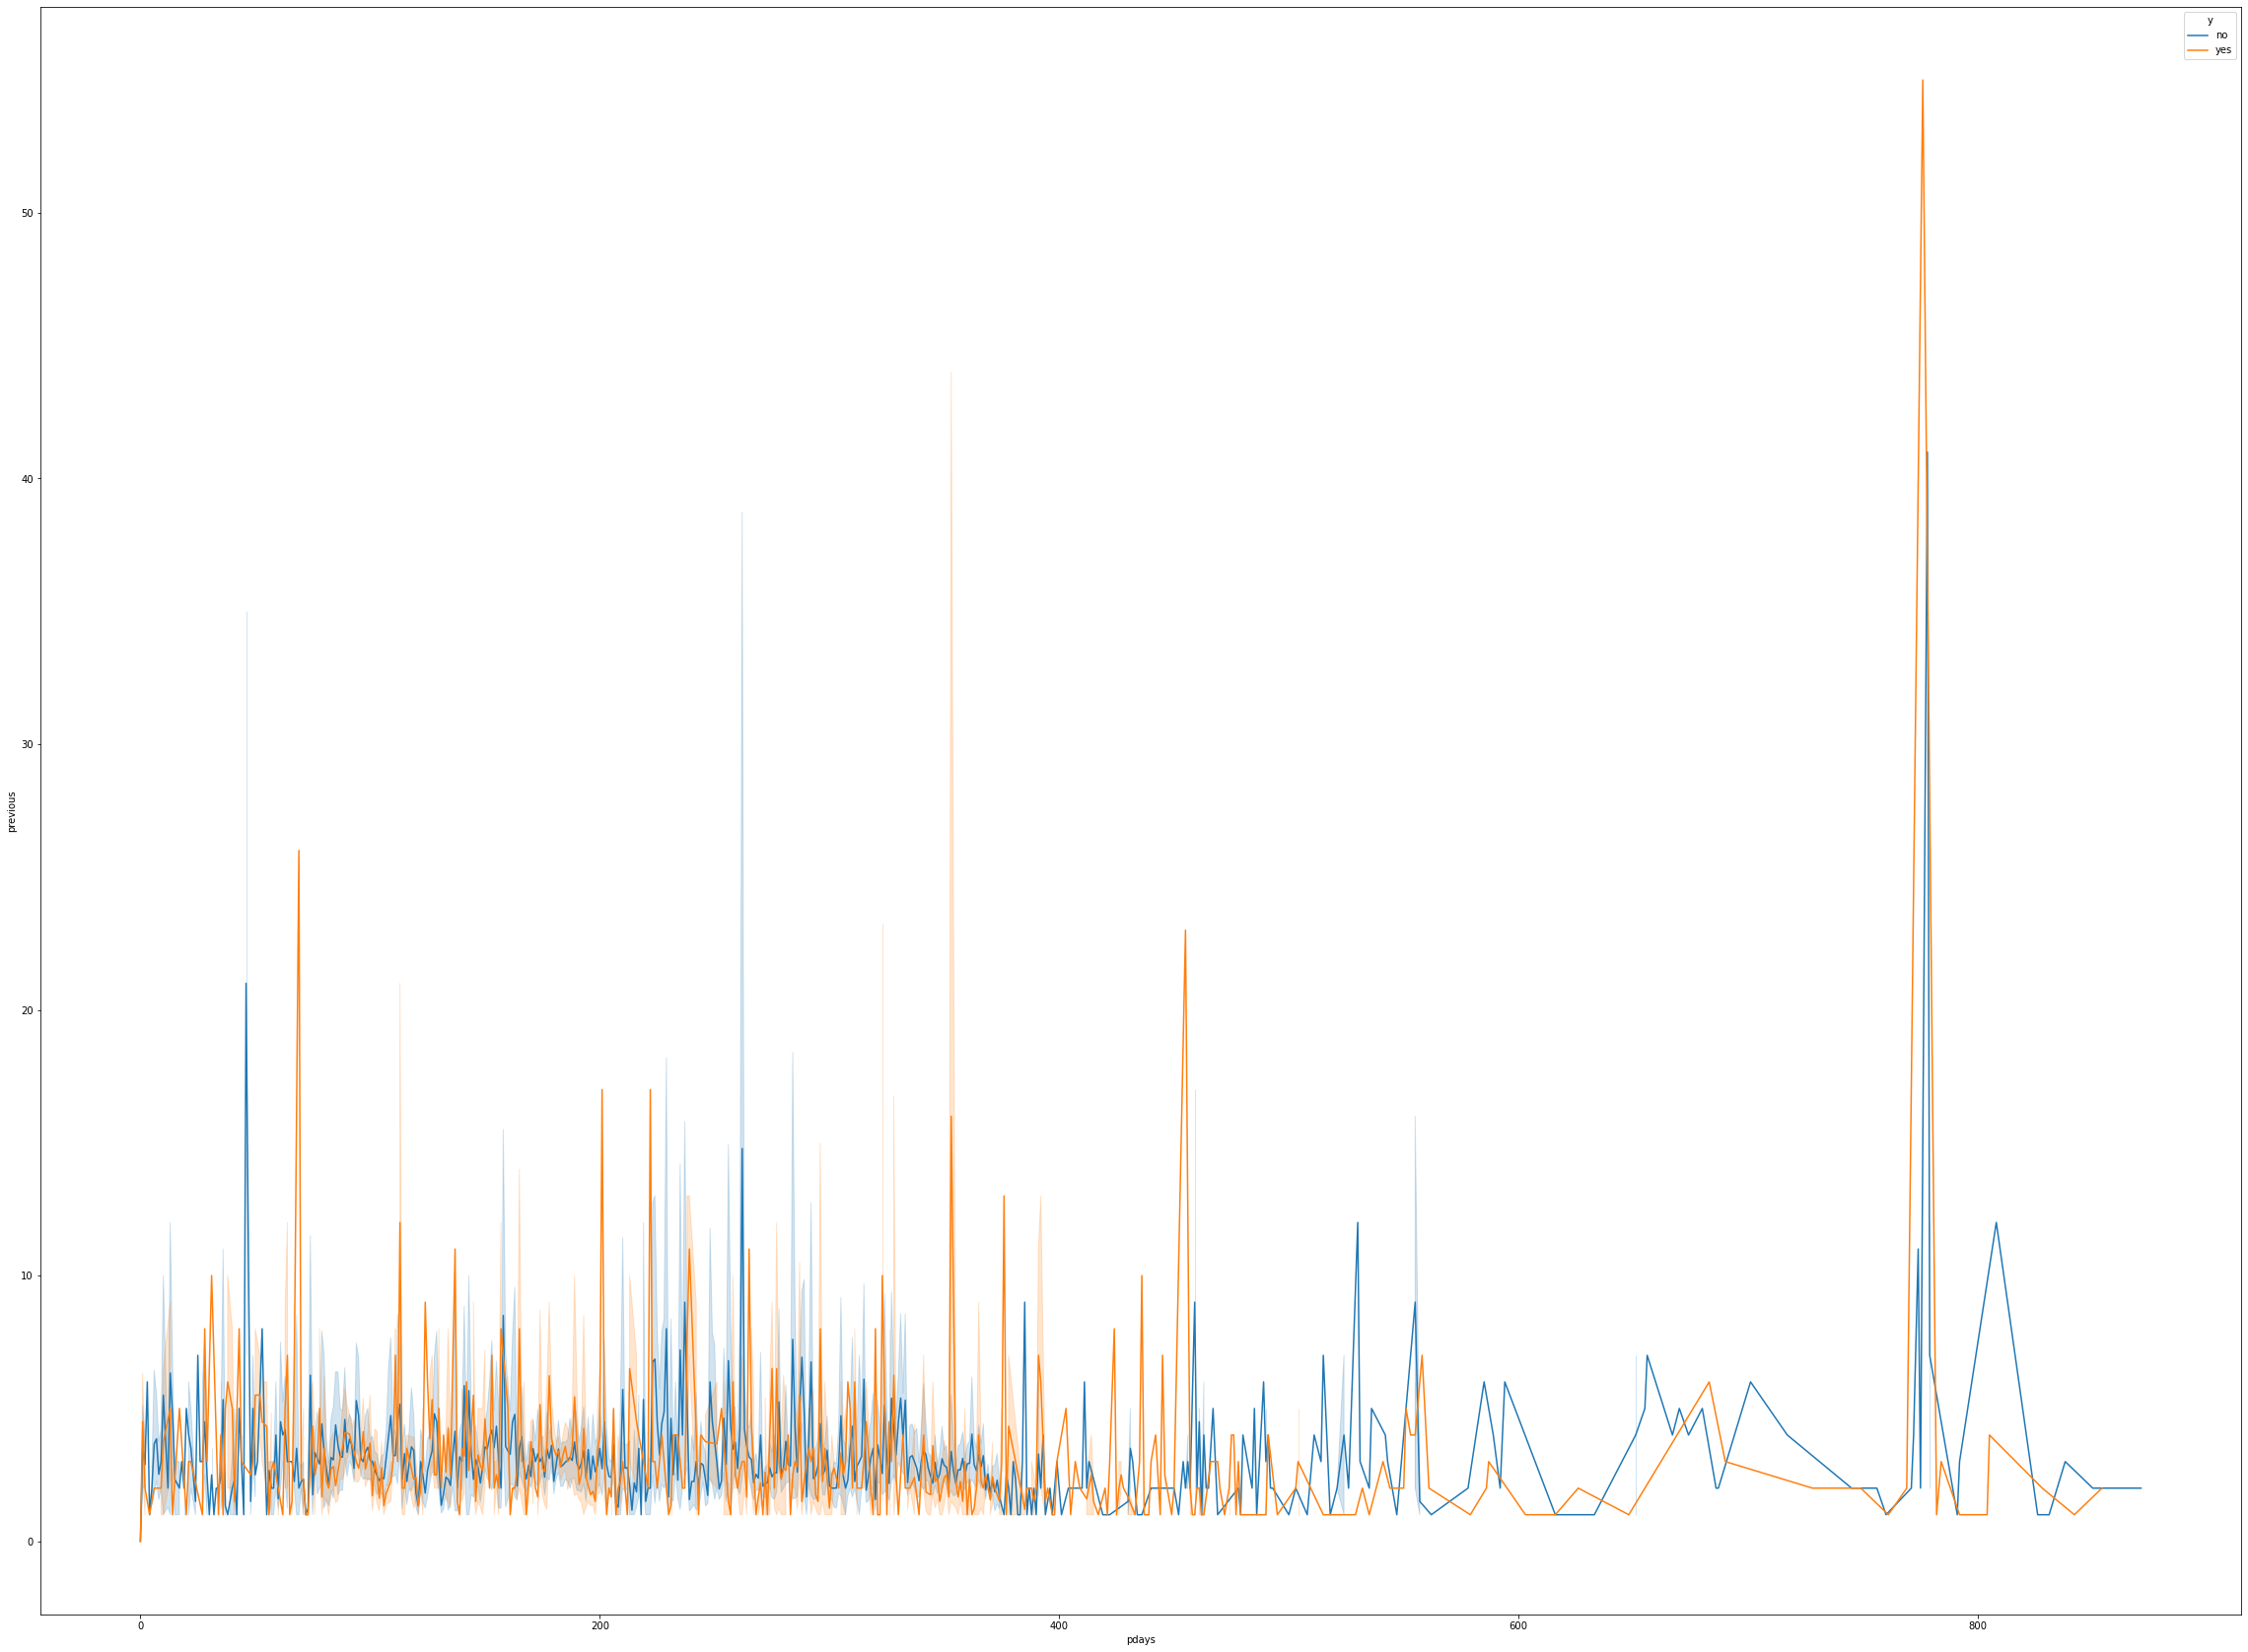

In [34]:
fig = plt.gcf()
sns.lineplot(data=bankfull, x="pdays", y="previous",hue="y")
fig.set_size_inches(40, 30)

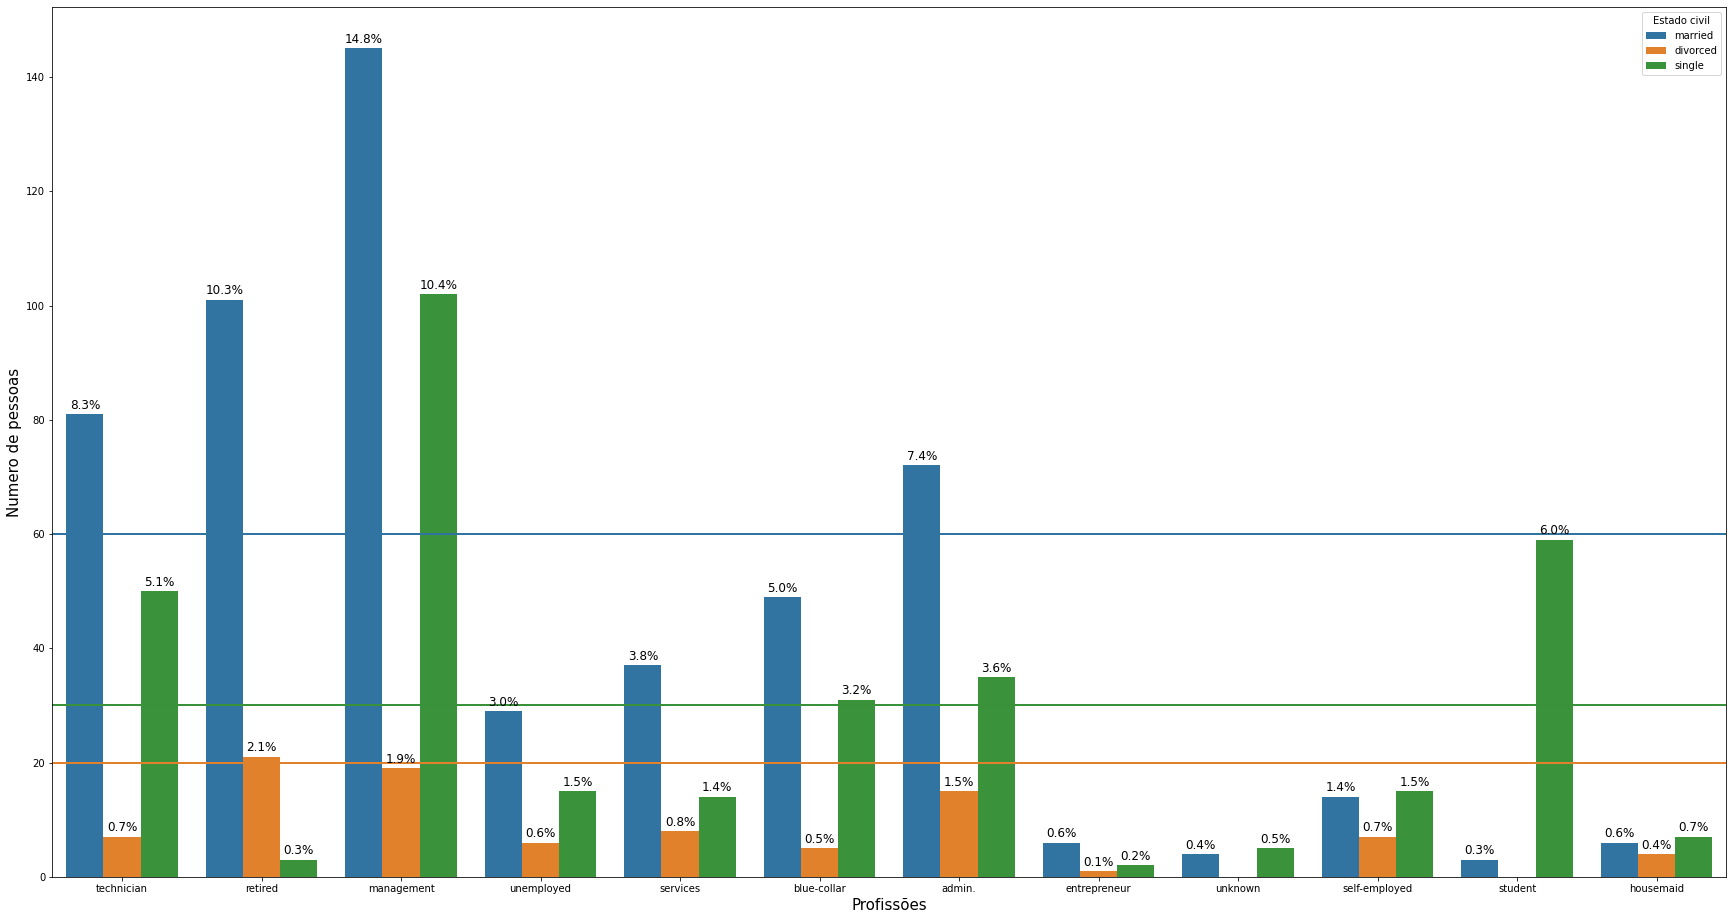

In [35]:
fig = plt.gcf()
df=  bankfull[bankfull['y'] == 'yes'] 
df = df[df['poutcome']=='success']
dflength=df.shape[0]
splot=sns.countplot(x="job", hue="marital", data=df)
for p in splot.patches:
    splot.annotate(format((p.get_height() * 100)/dflength, '.1f') + "%", 
                   (p.get_x() + p.get_width() / 2. , p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize=12)
fig.set_size_inches(30, 16)
plt.xlabel("Profissões", fontsize=15)
plt.ylabel("Numero de pessoas", fontsize=15)
splot.legend().set_title("Estado civil")
splot.axhline(30, color="#39923A", linewidth="2")
splot.axhline(60, color="#3274A1", linewidth="2")
splot.axhline(20, color="#E1812C", linewidth="2")

In [36]:
##Taxa de adesãoà camapnha por profissão e balanço

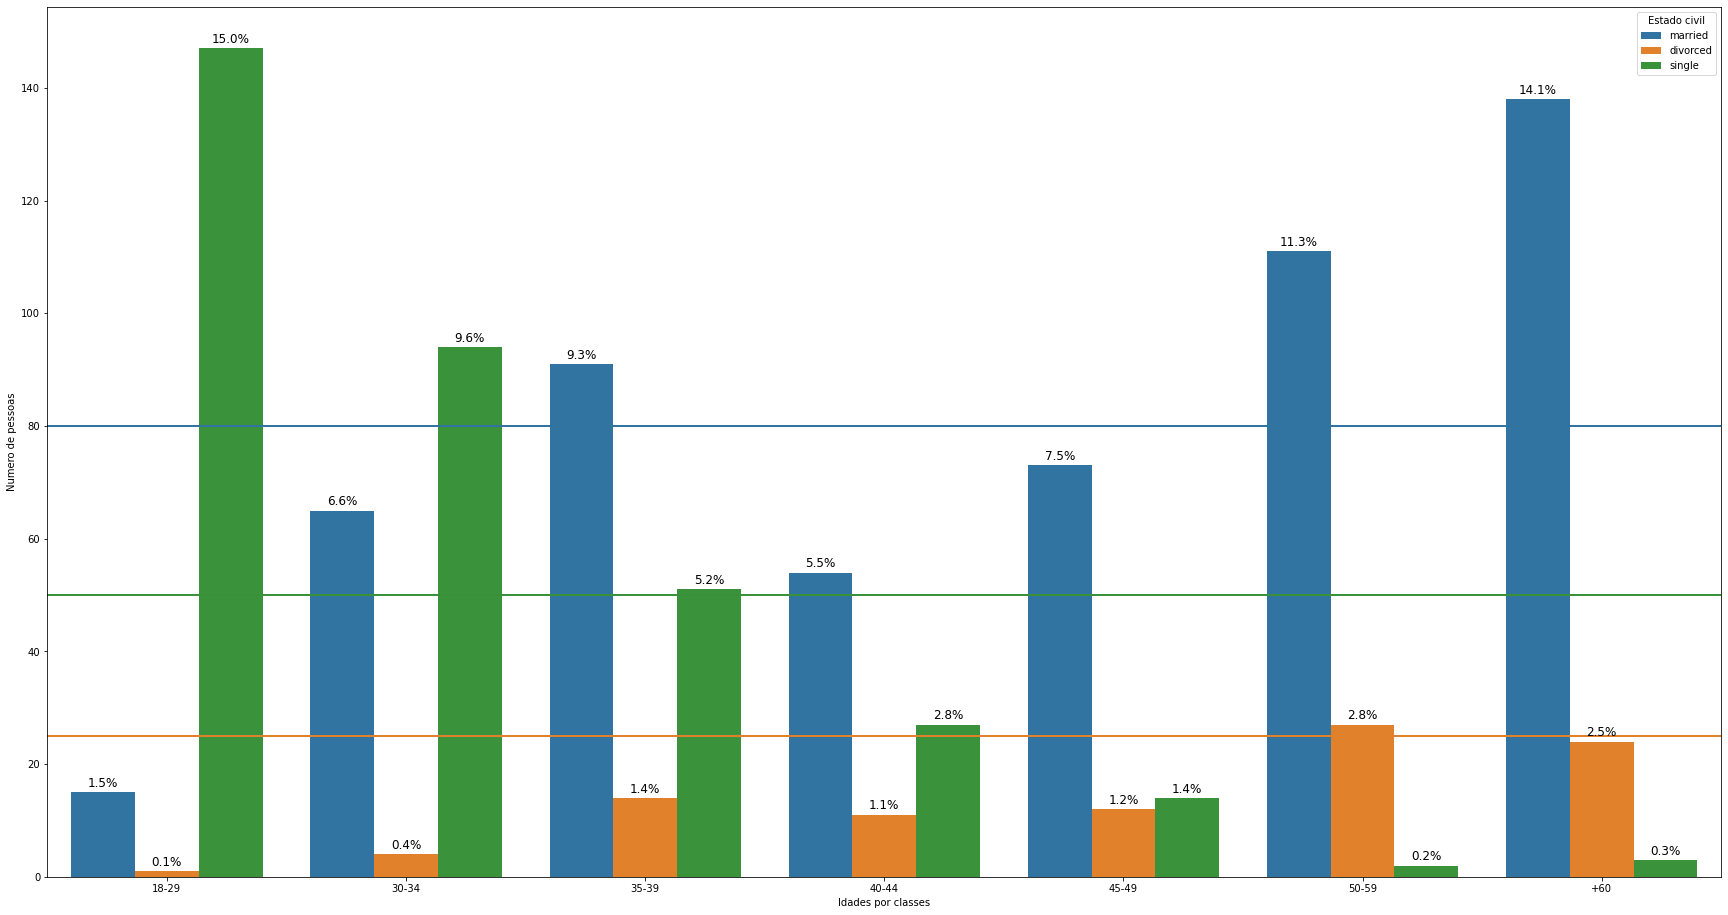

In [37]:
fig = plt.gcf()
df2=  bankfull[bankfull['y'] == 'yes'] 
df2 = df[df['poutcome']=='success']
df2length=df2.shape[0]
splot=sns.countplot(x="age_class", hue="marital", data=df, order=['18-29','30-34','35-39', '40-44','45-49','50-59', '+60'])
for p in splot.patches:
    splot.annotate(format((p.get_height() * 100)/df2length, '.1f') + "%", 
                   (p.get_x() + p.get_width() / 2. , p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize=12)
  
fig.set_size_inches(30, 16)
plt.xlabel("Idades por classes")
plt.ylabel("Numero de pessoas")
splot.legend().set_title("Estado civil")
splot.axhline(50, color="#39923A", linewidth="2")
splot.axhline(80, color="#3274A1", linewidth="2")
splot.axhline(25, color="#E1812C", linewidth="2")

In [38]:

##distribuição e idade/job e do seu balanço por pessoas que aderiram à campanha

Text(0.5, 1.0, 'Diferentes profissões por classe de idade e o seu balanço, considerando apenas balanços superiores 5k e que aderiram à campanha')

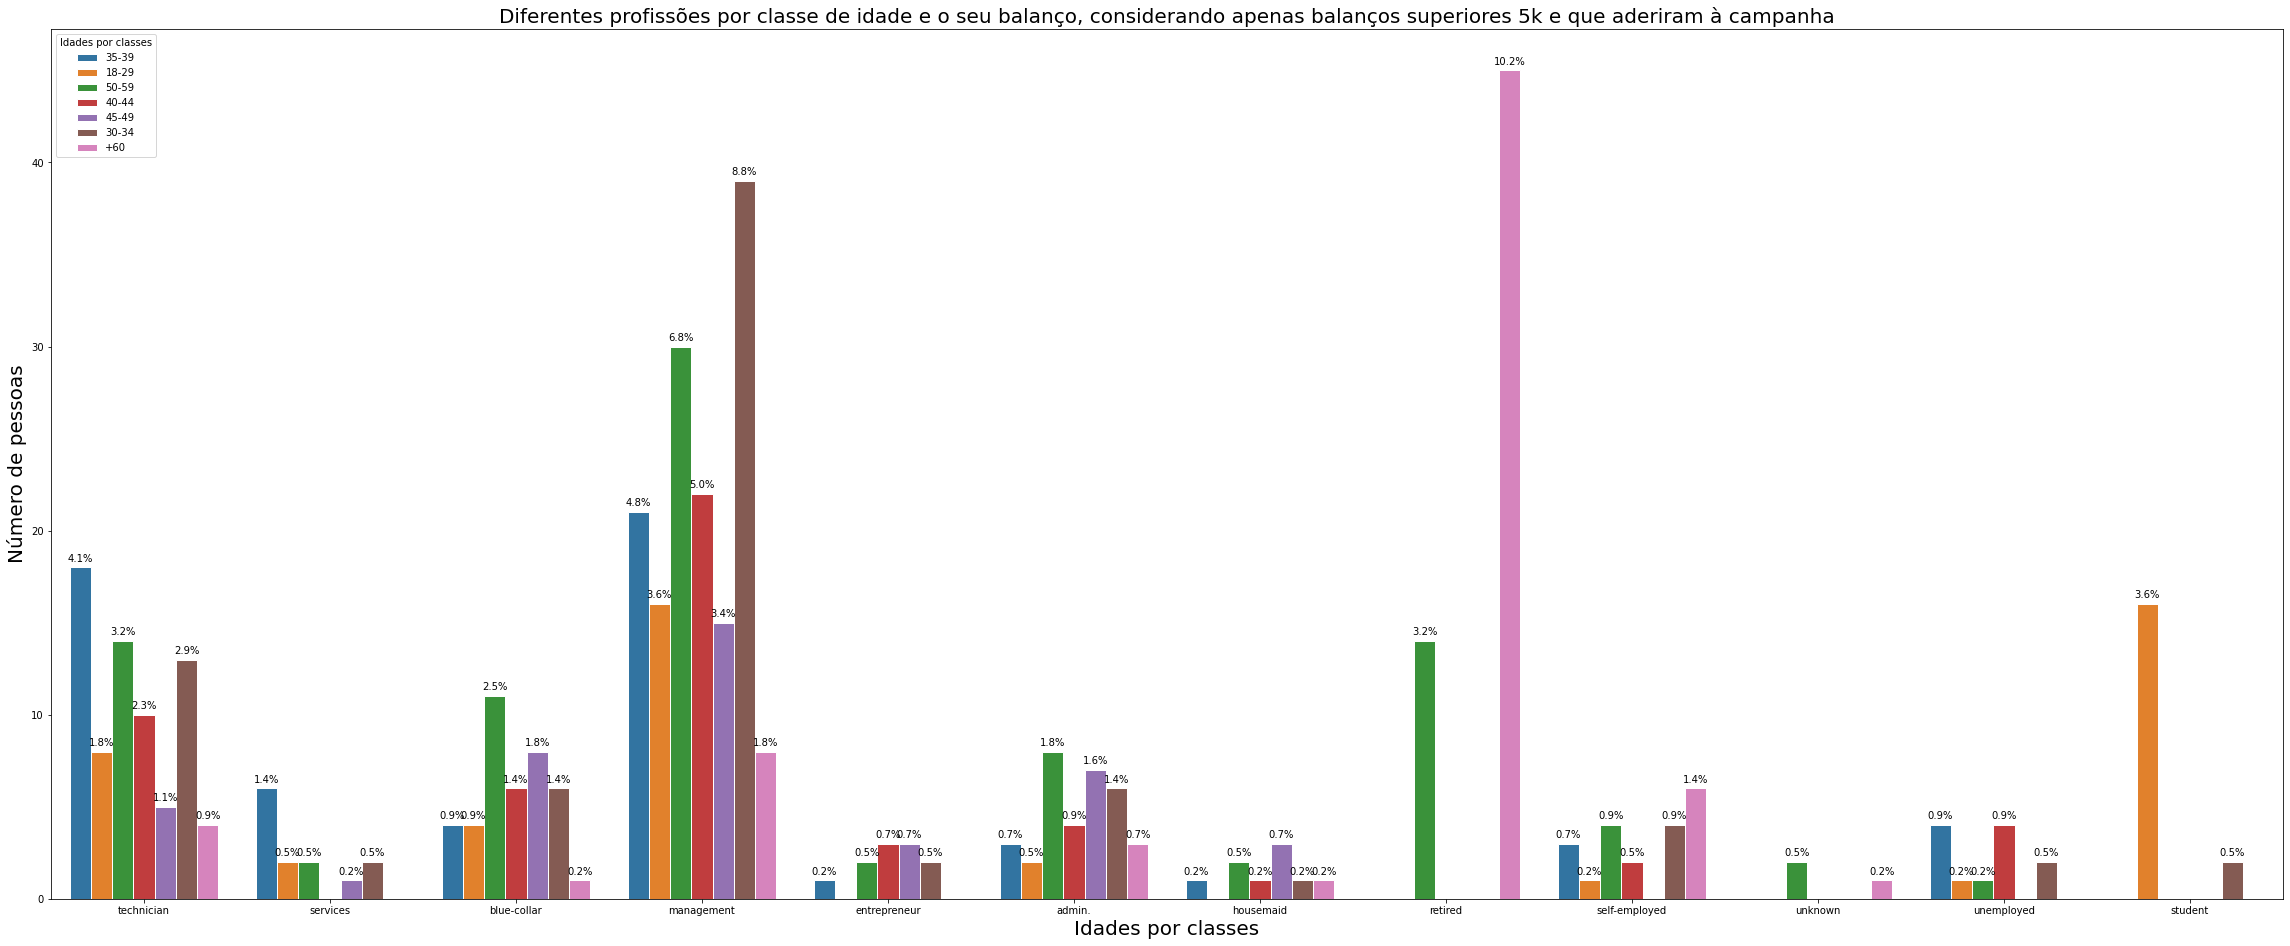

In [39]:
fig = plt.gcf()
df3=bankfull[(bankfull['y']=='yes')]
df3=df3[df3['balance']> 5000]
df3length=df3.shape[0]
splot=sns.countplot(x="job", hue="age_class", data=df3, edgecolor = 'w')
for p in splot.patches:
    splot.annotate(format((p.get_height() * 100)/df3length, '.1f') + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize=10)
  
fig.set_size_inches(40, 16)
plt.xlabel("Idades por classes",fontsize=20)
plt.ylabel("Número de pessoas",fontsize=20)
splot.legend(fontsize=15)
splot.legend().set_title("Idades por classes")
splot.set_title('Diferentes profissões por classe de idade e o seu balanço, considerando apenas balanços superiores 5k e que aderiram à campanha', fontsize=20)



In [40]:
##Número de pessoas com crédito pessoal e crédito habitação consoante a idade e seadiriram ou não à campanha 

Text(0, 420, 'Meta de baixar a percentagem de não adesão para os 10% ')

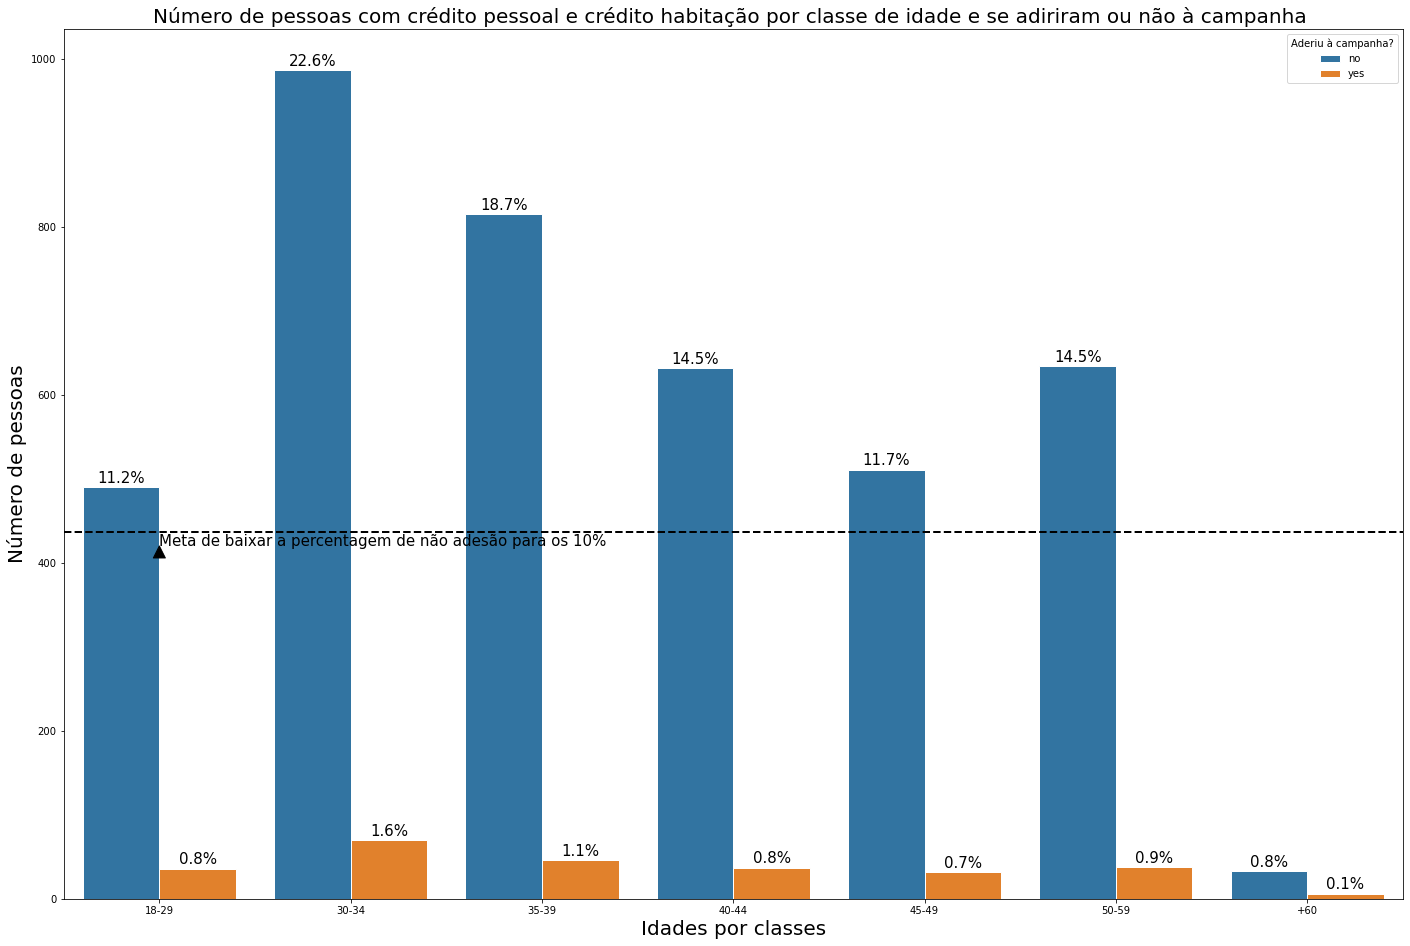

In [41]:
fig = plt.gcf()
df5=bankfull[(bankfull['housing_loan']=='yes')]
df5length=df5.shape[0]
y=(df5length*10)/100
splot=sns.countplot(x="age_class", hue="y", data=df5, edgecolor = 'w',order=['18-29','30-34','35-39', '40-44','45-49','50-59', '+60'])
for p in splot.patches:
    splot.annotate(format((p.get_height() * 100)/df5length, '.1f') + "%", 
                   (p.get_x() + p.get_width() / 2. , p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize=15)
  
fig.set_size_inches(24, 16)
plt.xlabel("Idades por classes",fontsize=20)
plt.ylabel("Número de pessoas",fontsize=20)
splot.legend(fontsize=20)
splot.legend().set_title("Aderiu à campanha?")
splot.set_title('Número de pessoas com crédito pessoal e crédito habitação por classe de idade e se adiriram ou não à campanha ', fontsize=20)
plt.axhline(y=y, linewidth=2, color="k", linestyle='--')
plt.annotate('Meta de baixar a percentagem de não adesão para os 10% ', color="k",
             arrowprops=dict(color = "k", width=1),xy=(0,420), fontsize=15)

Text(0.5, 1.0, 'Tentativas de contacto por classe de idade')

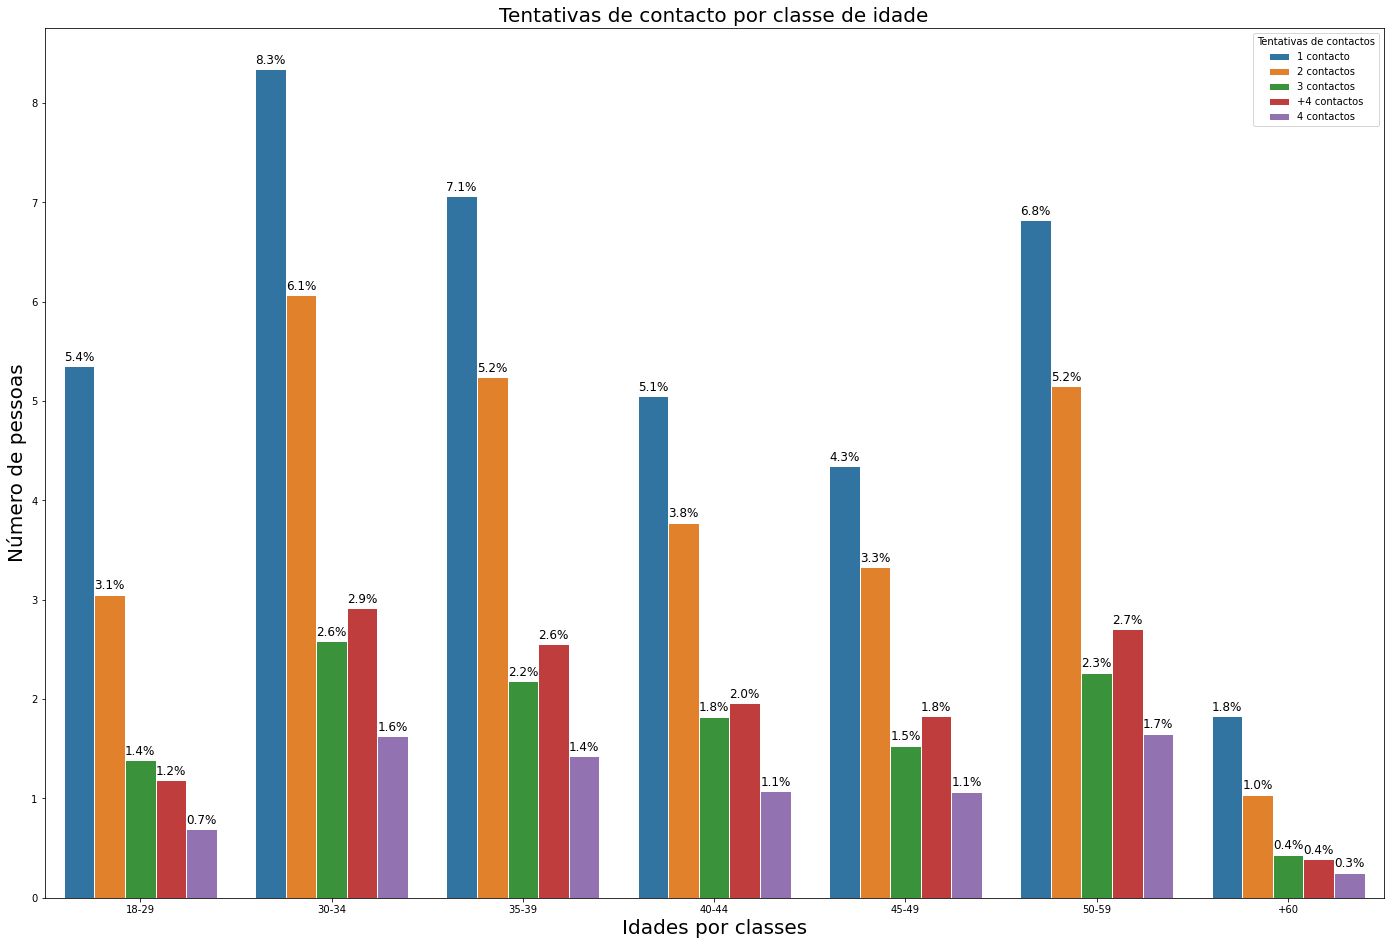

In [42]:
data = pd.DataFrame({'count' : bankfull.groupby('age_class')['campaign_class'].value_counts()}).reset_index()
datalength=bankfull.shape[0]
count_percent=""

data["count_percent"] = (data["count"] * 100)/datalength

fig = plt.gcf()
splot=sns.barplot(x="age_class", y="count_percent", hue="campaign_class", data=data, ci = None, edgecolor = 'w',order=['18-29','30-34','35-39', '40-44','45-49','50-59', '+60'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f') + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                  fontsize=12)
  
  
fig.set_size_inches(24, 16)
plt.xlabel("Idades por classes",fontsize=20)
plt.ylabel("Número de pessoas",fontsize=20)
splot.legend(fontsize=12)
splot.legend().set_title("Tentativas de contactos")
splot.set_title('Tentativas de contacto por classe de idade' , fontsize=20)


# Data Correlation

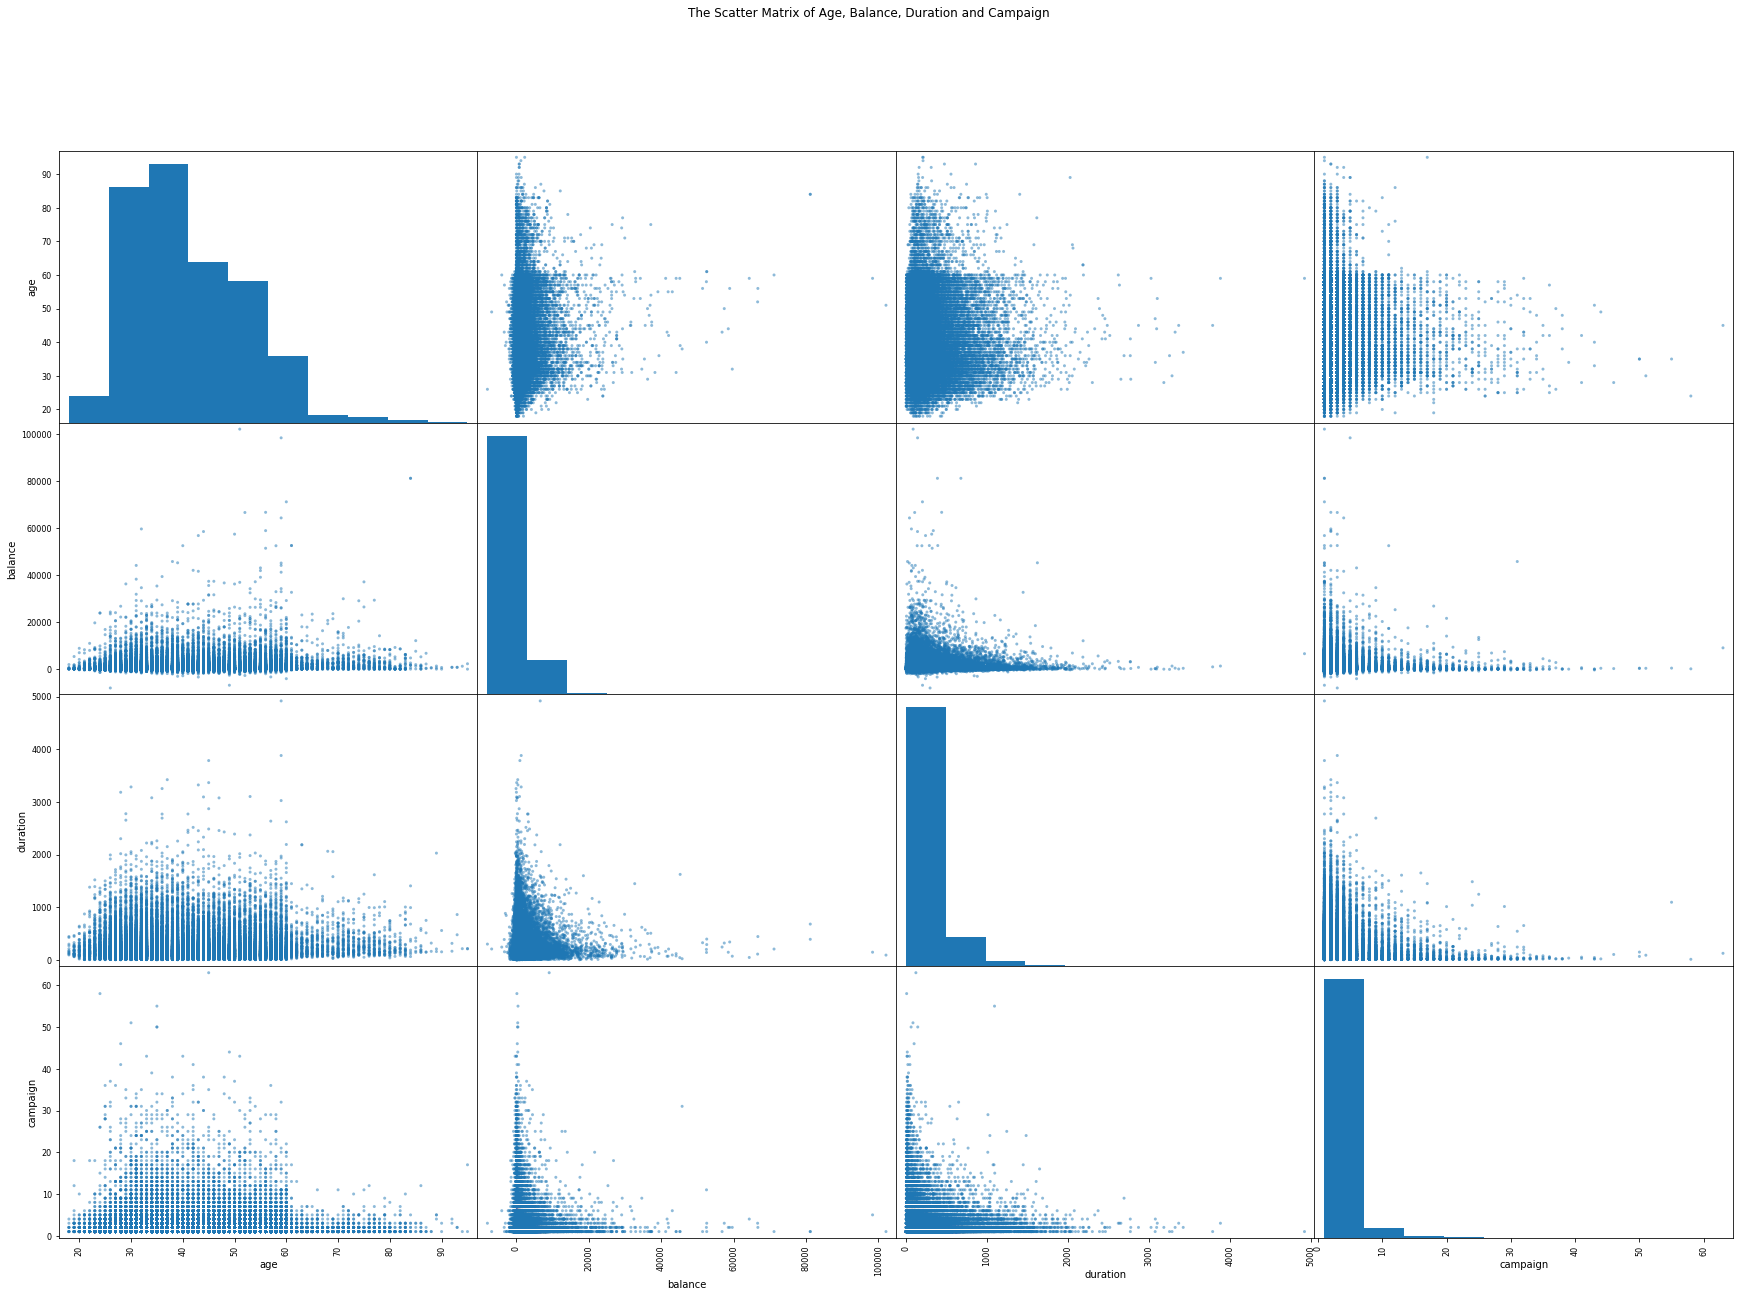

In [43]:
from pandas.plotting import scatter_matrix

matrix = scatter_matrix(bankfull[['age','balance','duration','campaign']],figsize=(30,20))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

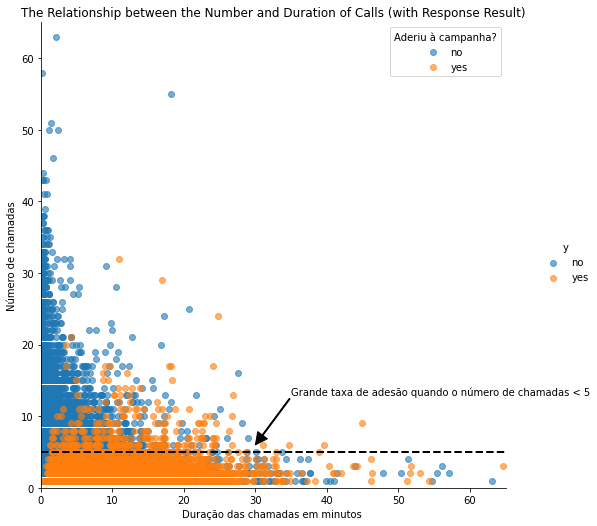

In [44]:
splot = sns.lmplot(x='duration_minutes', y='campaign',data = bankfull,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Número de chamadas')
plt.xlabel('Duração das chamadas em minutos ')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Grande taxa de adesão quando o número de chamadas < 5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.legend().set_title("Aderiu à campanha?")
plt.show()

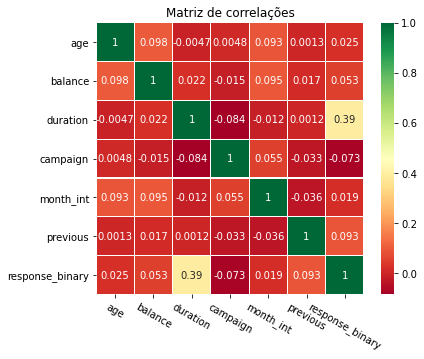

In [45]:
corr_data = bankfull[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Matriz de correlações')
plt.show()

In [46]:
bank_copy = bankfull.copy()
bank_copy2 = bank_copy.copy()

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bankfull = bankfull.apply(le.fit_transform)
bankfull=bankfull[['job','marital','education','housing_loan','age_class', 'balance_class','duration_minutes','y']]
bankfull.head()

job  marital  education  housing_loan  age_class  balance_class  \
0    4        1          2             0          6              3   
1    9        2          1             0          4              2   
2    2        1          1             1          2              2   
3    1        1          3             0          5              3   
4   11        2          3             0          2              2   

   duration_minutes  y  
0               260  0  
1               150  0  
2                75  0  
3                91  0  
4               197  0

#                      Clustering

# KModes

In [48]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bankfull)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 171851.0


In [49]:
fitClusters_cao

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [50]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bankfull.columns

In [51]:
clusterCentroidsDf

job  marital  education  housing_loan  age_class  balance_class  \
0    1        1          1             0          2              2   
1    4        2          2             0          6              3   

   duration_minutes  y  
0               123  0  
1               111  0

In [52]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bankfull)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5645, cost: 169660.0
Run 1, iteration: 2/100, moves: 5, cost: 169660.0


In [53]:
fitClusters_huang

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [54]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bankfull)
    cost.append(kmode.cost_)
   

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 190964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 171851.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 165360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 161450.0


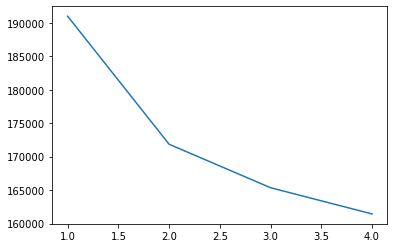

In [55]:
##We can determine optimum value of k using cost function
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [56]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bankfull)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 171851.0


In [57]:
fitClusters_cao

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [58]:
bankfull = bank_copy.reset_index()

In [59]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bankfull, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [60]:
combinedDf.head()

age           job  marital  education  balance housing loan  day month  \
0   58    management  married   tertiary     2143     yes   no    5   may   
1   44    technician   single  secondary       29     yes   no    5   may   
2   33  entrepreneur  married  secondary        2     yes  yes    5   may   
3   47   blue-collar  married    unknown     1506     yes   no    5   may   
4   33       unknown   single    unknown        1      no   no    5   may   

   duration  ...   y  month_int  response_binary duration_minutes age_class  \
0       261  ...  no        5.0                0         4.350000     50-59   
1       151  ...  no        5.0                0         2.516667     40-44   
2        76  ...  no        5.0                0         1.266667     30-34   
3        92  ...  no        5.0                0         1.533333     45-49   
4       198  ...  no        5.0                0         3.300000     30-34   

   balance_class    pdays_class  housing_loan campaign_class cluster_predicted  
0   1000-2999.99  not contacted            no     1 contacto                 1  
1       0-499.99  not contacted            no     1 contacto                 0  
2       0-499.99  not contacted           yes     1 contacto                 0  
3   1000-2999.99  not contacted            no     1 contacto                 0  
4       0-499.99  not contacted            no     1 contacto                 0  

[5 rows x 24 columns]

In [61]:
combinedDf[combinedDf['cluster_predicted']==0]

age           job  marital  education  balance housing loan  day month  \
1       44    technician   single  secondary       29     yes   no    5   may   
2       33  entrepreneur  married  secondary        2     yes  yes    5   may   
3       47   blue-collar  married    unknown     1506     yes   no    5   may   
4       33       unknown   single    unknown        1      no   no    5   may   
5       35    management  married   tertiary      231     yes   no    5   may   
...    ...           ...      ...        ...      ...     ...  ...  ...   ...   
45201   73       retired  married  secondary     2850      no   no   17   nov   
45202   25    technician   single  secondary      505      no  yes   17   nov   
45205   72       retired  married  secondary     5715      no   no   17   nov   
45206   57   blue-collar  married  secondary      668      no   no   17   nov   
45207   37  entrepreneur  married  secondary     2971      no   no   17   nov   

       duration  ...    y  month_int  response_binary duration_minutes  \
1           151  ...   no        5.0                0         2.516667   
2            76  ...   no        5.0                0         1.266667   
3            92  ...   no        5.0                0         1.533333   
4           198  ...   no        5.0                0         3.300000   
5           139  ...   no        5.0                0         2.316667   
...         ...  ...  ...        ...              ...              ...   
45201       300  ...  yes       11.0                1         5.000000   
45202       386  ...  yes       11.0                1         6.433333   
45205      1127  ...  yes       11.0                1        18.783333   
45206       508  ...   no       11.0                0         8.466667   
45207       361  ...   no       11.0                0         6.016667   

      age_class  balance_class    pdays_class  housing_loan campaign_class  \
1         40-44       0-499.99  not contacted            no     1 contacto   
2         30-34       0-499.99  not contacted           yes     1 contacto   
3         45-49   1000-2999.99  not contacted            no     1 contacto   
4         30-34       0-499.99  not contacted            no     1 contacto   
5         35-39       0-499.99  not contacted            no     1 contacto   
...         ...            ...            ...           ...            ...   
45201       +60   1000-2999.99    1ºtrimestre            no     1 contacto   
45202     18-29     500-999.99  not contacted            no    2 contactos   
45205       +60   5000-7499.99    3ºtrimestre            no   +4 contactos   
45206     50-59     500-999.99  not contacted            no    4 contactos   
45207     35-39   1000-2999.99    3ºtrimestre            no    2 contactos   

      cluster_predicted  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
...                 ...  
45201                 0  
45202                 0  
45205                 0  
45206                 0  
45207                 0  

[34096 rows x 24 columns]

In [62]:
combinedDf[combinedDf['cluster_predicted']==1]

age         job   marital  education  balance housing loan  day month  \
0       58  management   married   tertiary     2143     yes   no    5   may   
6       28  management    single   tertiary      447     yes  yes    5   may   
21      56  management   married   tertiary      779     yes   no    5   may   
26      39  management    single   tertiary      255     yes   no    5   may   
28      46  management    single  secondary     -246     yes   no    5   may   
...    ...         ...       ...        ...      ...     ...  ...  ...   ...   
45195   37  management   married   tertiary     1428      no   no   16   nov   
45198   53  management   married   tertiary      583      no   no   17   nov   
45200   23     student    single   tertiary      113      no   no   17   nov   
45203   51  technician   married   tertiary      825      no   no   17   nov   
45204   71     retired  divorced    primary     1729      no   no   17   nov   

       duration  ...    y  month_int  response_binary duration_minutes  \
0           261  ...   no        5.0                0         4.350000   
6           217  ...   no        5.0                0         3.616667   
21          164  ...   no        5.0                0         2.733333   
26          296  ...   no        5.0                0         4.933333   
28          255  ...   no        5.0                0         4.250000   
...         ...  ...  ...        ...              ...              ...   
45195       333  ...   no       11.0                0         5.550000   
45198       226  ...  yes       11.0                1         3.766667   
45200       266  ...  yes       11.0                1         4.433333   
45203       977  ...  yes       11.0                1        16.283333   
45204       456  ...  yes       11.0                1         7.600000   

      age_class  balance_class    pdays_class  housing_loan campaign_class  \
0         50-59   1000-2999.99  not contacted            no     1 contacto   
6         18-29       0-499.99  not contacted           yes     1 contacto   
21        50-59     500-999.99  not contacted            no     1 contacto   
26        35-39       0-499.99  not contacted            no     1 contacto   
28        45-49             -0  not contacted            no    2 contactos   
...         ...            ...            ...           ...            ...   
45195     35-39   1000-2999.99  not contacted            no    2 contactos   
45198     50-59     500-999.99    3ºtrimestre            no     1 contacto   
45200     18-29       0-499.99  not contacted            no     1 contacto   
45203     50-59     500-999.99  not contacted            no    3 contactos   
45204       +60   1000-2999.99  not contacted            no    2 contactos   

      cluster_predicted  
0                     1  
6                     1  
21                    1  
26                    1  
28                    1  
...                 ...  
45195                 1  
45198                 1  
45200                 1  
45203                 1  
45204                 1  

[11112 rows x 24 columns]

In [63]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

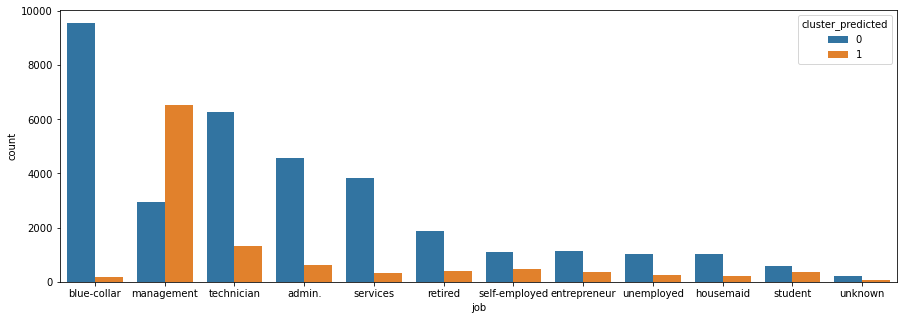

In [64]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

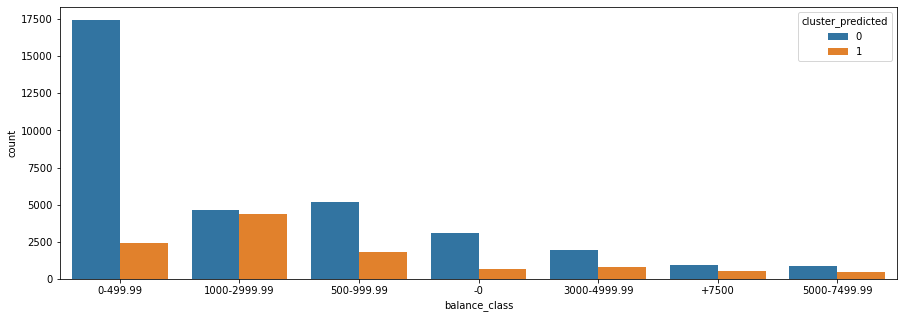

In [65]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['balance_class'],order=combinedDf['balance_class'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

# KMeans

In [66]:
bank_copy2

age           job   marital  education  balance housing loan  day  \
0       58    management   married   tertiary     2143     yes   no    5   
1       44    technician    single  secondary       29     yes   no    5   
2       33  entrepreneur   married  secondary        2     yes  yes    5   
3       47   blue-collar   married    unknown     1506     yes   no    5   
4       33       unknown    single    unknown        1      no   no    5   
...    ...           ...       ...        ...      ...     ...  ...  ...   
45206   51    technician   married   tertiary      825      no   no   17   
45207   71       retired  divorced    primary     1729      no   no   17   
45208   72       retired   married  secondary     5715      no   no   17   
45209   57   blue-collar   married  secondary      668      no   no   17   
45210   37  entrepreneur   married  secondary     2971      no   no   17   

      month  duration  ...  poutcome    y  month_int response_binary  \
0       may       261  ...   unknown   no        5.0               0   
1       may       151  ...   unknown   no        5.0               0   
2       may        76  ...   unknown   no        5.0               0   
3       may        92  ...   unknown   no        5.0               0   
4       may       198  ...   unknown   no        5.0               0   
...     ...       ...  ...       ...  ...        ...             ...   
45206   nov       977  ...   unknown  yes       11.0               1   
45207   nov       456  ...   unknown  yes       11.0               1   
45208   nov      1127  ...   success  yes       11.0               1   
45209   nov       508  ...   unknown   no       11.0               0   
45210   nov       361  ...     other   no       11.0               0   

      duration_minutes  age_class  balance_class    pdays_class housing_loan  \
0             4.350000      50-59   1000-2999.99  not contacted           no   
1             2.516667      40-44       0-499.99  not contacted           no   
2             1.266667      30-34       0-499.99  not contacted          yes   
3             1.533333      45-49   1000-2999.99  not contacted           no   
4             3.300000      30-34       0-499.99  not contacted           no   
...                ...        ...            ...            ...          ...   
45206        16.283333      50-59     500-999.99  not contacted           no   
45207         7.600000        +60   1000-2999.99  not contacted           no   
45208        18.783333        +60   5000-7499.99    3ºtrimestre           no   
45209         8.466667      50-59     500-999.99  not contacted           no   
45210         6.016667      35-39   1000-2999.99    3ºtrimestre           no   

      campaign_class  
0         1 contacto  
1         1 contacto  
2         1 contacto  
3         1 contacto  
4         1 contacto  
...              ...  
45206    3 contactos  
45207    2 contactos  
45208   +4 contactos  
45209    4 contactos  
45210    2 contactos  

[45208 rows x 23 columns]

In [67]:
x=bank_copy2.iloc[:,[1,2,3,18,19,21,17,14]]
x = x.apply(le.fit_transform)
x=x.values

In [68]:
x

array([[   4,    1,    2, ...,    0,  260,    0],
       [   9,    2,    1, ...,    0,  150,    0],
       [   2,    1,    1, ...,    1,   75,    0],
       ...,
       [   5,    1,    1, ...,    0, 1115,    1],
       [   1,    1,    1, ...,    0,  507,    0],
       [   2,    1,    1, ...,    0,  360,    0]], dtype=int64)

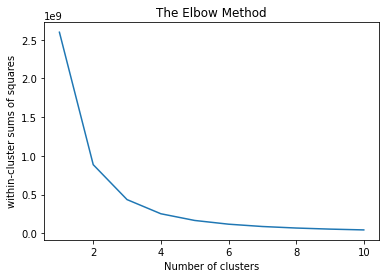

In [69]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sums of squares')
plt.show()



In [70]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
fitClusters_kmeans = kmeans.fit_predict(x)

In [71]:
fitClusters_kmeans

array([0, 0, 0, ..., 1, 1, 0])

In [72]:
clustersKM = pd.DataFrame(fitClusters_kmeans)
clustersKM.columns = ['cluster_predicted_KMeans']
combinedDf = pd.concat([bankfull, clustersKM], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
#combinedDf = combinedDf.to_csv('combinedDf.csv', index = True) 

In [73]:
cluster_0 = combinedDf[combinedDf['cluster_predicted_KMeans'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted_KMeans'] == 1]

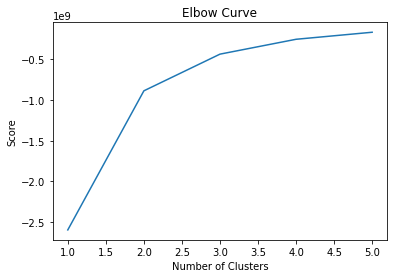

In [74]:

import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
Nc = range(1, 6)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


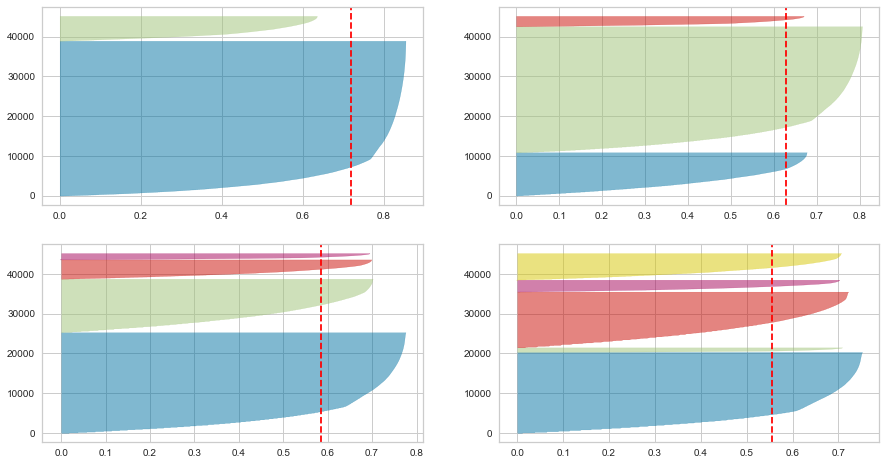

In [75]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
   
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

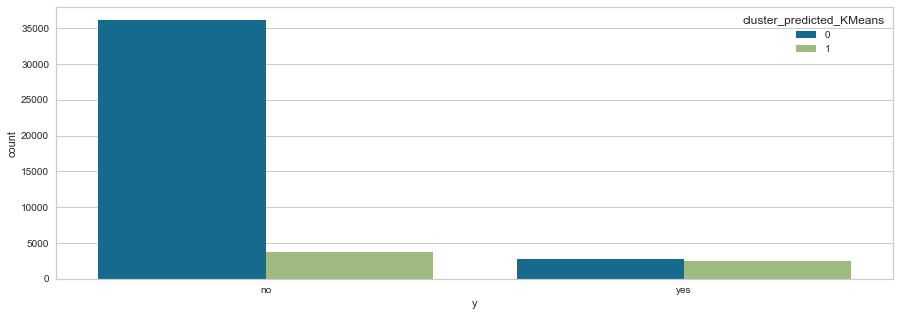

In [76]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['y'],order=combinedDf['y'].value_counts().index,hue=combinedDf['cluster_predicted_KMeans'])
plt.show()

# Classification using gaussian-naive-bayes-classifier

In [77]:
bank_copy_rev = bank_copy

In [78]:

bank_copy_rev=bank_copy_rev[['job','marital','education','housing_loan','age_class', 'balance_class','duration_minutes','y']]


In [79]:
bank_copy_rev = bank_copy_rev.apply(le.fit_transform)

In [80]:
bank_copy_rev

job  marital  education  housing_loan  age_class  balance_class  \
0        4        1          2             0          6              3   
1        9        2          1             0          4              2   
2        2        1          1             1          2              2   
3        1        1          3             0          5              3   
4       11        2          3             0          2              2   
...    ...      ...        ...           ...        ...            ...   
45206    9        1          2             0          6              5   
45207    5        0          0             0          0              3   
45208    5        1          1             0          0              6   
45209    1        1          1             0          6              5   
45210    2        1          1             0          3              3   

       duration_minutes  y  
0                   260  0  
1                   150  0  
2                    75  0  
3                    91  0  
4                   197  0  
...                 ... ..  
45206               974  1  
45207               455  1  
45208              1115  1  
45209               507  0  
45210               360  0  

[45208 rows x 8 columns]

In [81]:
features = bank_copy_rev.values[:,:7]
target = bank_copy_rev.values[:,7]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.33, random_state = 10)

In [82]:
features

array([[   4,    1,    2, ...,    6,    3,  260],
       [   9,    2,    1, ...,    4,    2,  150],
       [   2,    1,    1, ...,    2,    2,   75],
       ...,
       [   5,    1,    1, ...,    0,    6, 1115],
       [   1,    1,    1, ...,    6,    5,  507],
       [   2,    1,    1, ...,    3,    3,  360]], dtype=int64)

In [83]:
target

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [84]:

clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

In [85]:
accuracy_score(target_test, target_pred, normalize = True)

0.8888665460151485

In [86]:

accuracy = accuracy_score(target_test,target_pred)
report = classification_report(target_pred, target_test)
cm = confusion_matrix(target_test, target_pred)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.8888665460151485
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     13879
           1       0.32      0.53      0.40      1040

    accuracy                           0.89     14919
   macro avg       0.64      0.72      0.67     14919
weighted avg       0.92      0.89      0.90     14919

Confusion matrix:
[[12715   494]
 [ 1164   546]]


In [87]:
print("True positive is 12715.")
print("True negative is 546.")
print ("False positive is 494.")
print ("False negative is 1164.")


True positive is 12715.
True negative is 546.
False positive is 494.
False negative is 1164.


In [88]:
TP=12715
TN=546
FP=494
FN=1164
TPR = TP / (TP + FN)
SPC = TN / (FP + TN)
ACC = (TP + TN) / ((TP+FP+FN+TN))
F1 = 2*TP / (2*TP + FP + FN)

print("The Sensitivity is: " + str(TPR))
print("The Specificity is: " + str(SPC))
print("The Accuracy is: " + str(ACC))
print("The F1 Score is: " + str(F1))


The Sensitivity is: 0.9161322861877657
The Specificity is: 0.525
The Accuracy is: 0.8888665460151485
The F1 Score is: 0.9387920850561134


Area under the Receiver Operating Characteristic curve: 0.6409497511664695


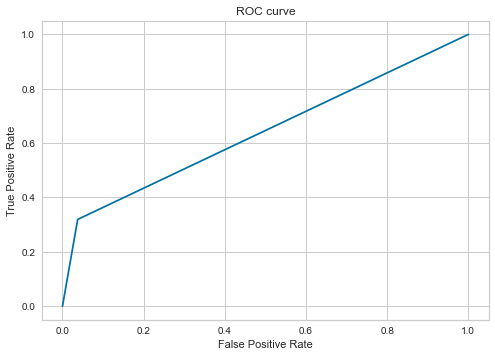

In [89]:
roc_auc_score(target_test, target_pred)

fpr, tpr, thresholds = roc_curve(target_test, target_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(target_test, target_pred))

# Linear Regression

In [90]:
bank_copy_reg = bank_copy

In [91]:
bank_copy_reg.head()

age           job  marital  education  balance housing loan  day month  \
0   58    management  married   tertiary     2143     yes   no    5   may   
1   44    technician   single  secondary       29     yes   no    5   may   
2   33  entrepreneur  married  secondary        2     yes  yes    5   may   
3   47   blue-collar  married    unknown     1506     yes   no    5   may   
4   33       unknown   single    unknown        1      no   no    5   may   

   duration  ...  poutcome   y  month_int response_binary duration_minutes  \
0       261  ...   unknown  no        5.0               0         4.350000   
1       151  ...   unknown  no        5.0               0         2.516667   
2        76  ...   unknown  no        5.0               0         1.266667   
3        92  ...   unknown  no        5.0               0         1.533333   
4       198  ...   unknown  no        5.0               0         3.300000   

   age_class  balance_class    pdays_class housing_loan campaign_class  
0      50-59   1000-2999.99  not contacted           no     1 contacto  
1      40-44       0-499.99  not contacted           no     1 contacto  
2      30-34       0-499.99  not contacted          yes     1 contacto  
3      45-49   1000-2999.99  not contacted           no     1 contacto  
4      30-34       0-499.99  not contacted           no     1 contacto  

[5 rows x 23 columns]

In [92]:
bank_copy_reg=bank_copy_reg[['job','marital','education','housing_loan','age_class', 'balance_class','duration_minutes','y']]

In [93]:
X, y = bank_copy_reg.iloc[:, :-1], bank_copy_reg.iloc[:, -1]



In [94]:
X  = X.apply(le.fit_transform)


In [95]:
y = pd.DataFrame (y)
y = y.apply(le.fit_transform)

In [96]:
model = LinearRegression().fit(X, y)

In [97]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.18206966807782


In [98]:
print('intercept:', model.intercept_)
intercept: 5.633333333333329
print('slope:', model.coef_)


intercept: [-0.02837304]
slope: [[ 0.00240867  0.00166747  0.02229497 -0.05411457 -0.01473249  0.00841323
   0.00053989]]


# Decision Tree

In [99]:
bank_copy_tree = bank_copy

In [100]:
#split dataset in features and target variable
feature_cols=['housing_loan','age_class', 'balance_class','duration_minutes','campaign_class']
#X = bank_copy_tree[['job','education','housing_loan','age_class', 'balance_class','duration_minutes']]
X = bank_copy_tree[['housing_loan','age_class', 'balance_class','duration_minutes','campaign_class']]
y = bank_copy_tree[['y']]

In [101]:
X = X.apply(le.fit_transform)
y = y.apply(le.fit_transform)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [103]:
X 

housing_loan  age_class  balance_class  duration_minutes  \
0                 0          6              3               260   
1                 0          4              2               150   
2                 1          2              2                75   
3                 0          5              3                91   
4                 0          2              2               197   
...             ...        ...            ...               ...   
45206             0          6              5               974   
45207             0          0              3               455   
45208             0          0              6              1115   
45209             0          6              5               507   
45210             0          3              3               360   

       campaign_class  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
45206               3  
45207               2  
45208               0  
45209               4  
45210               2  

[45208 rows x 5 columns]

In [104]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [105]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8463466784634668


In [106]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8916906289169063


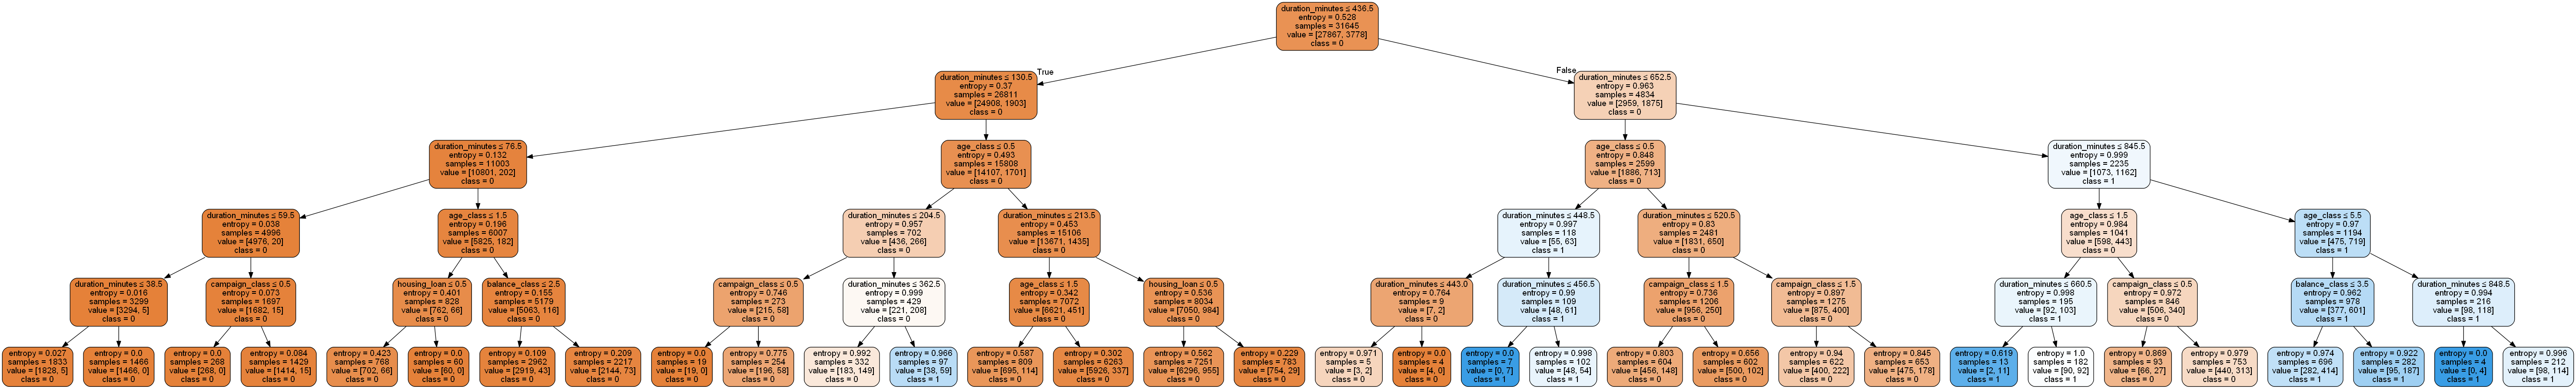

In [107]:

from io import StringIO
from IPython.display import Image  
import pydot
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('clients2.png')
Image(graph.create_png())

# Draw Dashboard

In [108]:
df = pd.read_csv('combinedDf.csv')
df=df[['job','marital','education','housing_loan','age_class', 'balance_class','duration_minutes','y','cluster_predicted_KMeans']]
df['duration_minutes'] = df['duration_minutes'].round(1)
df= df.replace({'cluster_predicted_KMeans': {0: 'Cluster 0', 1: 'Cluster 1'}})

In [109]:
abc=pd.DataFrame(df['cluster_predicted_KMeans'].value_counts())
abc = abc.transpose()
abc = abc.rename(columns={0: "Cluster 0", 1: "Cluster 1"}, index={'cluster_predicted_KMeans': 'Número de clientes'})
abc

Cluster 0  Cluster 1
Número de clientes      38955       6253

In [110]:
le = preprocessing.LabelEncoder()
bankfull = pd.read_csv('bankcopy.csv')
bankfull=bankfull[['age', 'balance','duration_minutes']]

In [ ]:

app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

#---------------------------------------------------------------
controls = dbc.Card(
    [
        dbc.FormGroup(
            [
                dbc.Label("X variable"),
                dcc.Dropdown(
                    id="x-variable",
                    options=[
                        {"label": col, "value": col} for col in bankfull.columns
                    ],
                    value="age",
                ),
            ]
        ),
        dbc.FormGroup(
            [
                dbc.Label("Y variable"),
                dcc.Dropdown(
                    id="y-variable",
                    options=[
                        {"label": col, "value": col} for col in bankfull.columns
                    ],
                    value="balance",
                ),
            ]
        ),
        dbc.FormGroup(
            [
                dbc.Label("Cluster count"),
                dbc.Input(id="cluster-count", type="number", value=3),
            ]
        ),
    ],
    body=True,
)


#---start app layout --------------- 
app.layout = html.Div([
     html.H1(children='Clients segmentation with Clustering'),
    
    dbc.Container(
    [
        
        html.Hr(),
        dbc.Row(
            [
                dbc.Col(controls, md=4),
                dbc.Col(dcc.Graph(id="cluster-graph"), md=8),
            ],
            align="center",
        ),
    ],
    fluid=True,
),

    
    html.Div([
       html.Label(['Compare clients attributes']),
        dcc.Dropdown(
            id='my_dropdown',
            options=[
                     {'label': 'Age', 'value': 'age_class'},
                     {'label': 'Housing and Personal loan', 'value': 'housing_loan'},
                     {'label': 'Balance', 'value': 'balance_class'},
                     {'label': 'Subscribe', 'value': 'y'},
                     {'label': 'Job', 'value': 'job'},
                     {'label': 'Marital', 'value': 'marital'}
            ],
            value='age_class',
            multi=False,
            clearable=False,
            style={"width": "50%"}
        ),#close drowdown
    ]),

    html.Div([
        dcc.Graph(id='the_graph')
    ]),#close graph
    
     html.Div([ 
    html.Hr(),
    html.Label(['Number of clients by Cluster']),
    dash_table.DataTable(
    id='table',
    columns=[{"name": i, "id": i} for i in abc.columns],
    data=abc.to_dict('records'),
)
         ]),#close Dash Table
    
    #start histogram plot
    html.Div([
    html.Hr(),
    dcc.Graph(id="graph"),
    html.P("Minium value:"),
    dcc.Slider(id="minium", min=0, max=82, value=0, 
               marks={0: '0', 82: '82'}),
    html.P("Max value:"),
    dcc.Slider(id="maxium", min=0, max=82, value=10, 
               marks={0: '0', 82: '82'}),
])#end graph
    
  

])#end app.layout

#---------------------------------------------------------------
@app.callback(
    Output(component_id='the_graph', component_property='figure'),
    [Input(component_id='my_dropdown', component_property='value')]
)

def update_graph(my_dropdown):
    dff = df.groupby(by=[my_dropdown, "cluster_predicted_KMeans"]).size().reset_index(name="counts")

    graph=px.bar(dff, x=my_dropdown, y="counts", color="cluster_predicted_KMeans", labels=dict(age_class="Clients age by class", counts="Number of clients", cluster_predicted_KMeans="Cluster type"))

    return (graph)
#histogram code----------------------------------------------
@app.callback(

 Output("graph", "figure"), 
    [Input("minium", "value"), 
     Input("maxium", "value")])
def display_color(minium,maxium):
   
    fig = px.histogram(df[(df['duration_minutes']> minium) & (df['duration_minutes']< maxium)], x="duration_minutes", color="cluster_predicted_KMeans",labels=dict(duration_minutes="Call duration in minutes", count="Number of clients", cluster_predicted_KMeans="Cluster type"))
    return (fig)


#Centroids code ------------------


@app.callback(
    Output("cluster-graph", "figure"),
    [
        Input("x-variable", "value"),
        Input("y-variable", "value"),
        Input("cluster-count", "value"),
    ],
)
    
def make_graph(x, y, n_clusters):
    # minimal input validation, make sure there's at least one cluster
    km = KMeans(n_clusters=max(n_clusters, 1), init='k-means++', max_iter=300, n_init=10, random_state=0)
    df = bankfull.loc[:, [x, y]]
    km.fit_predict(df.values)
    df["cluster"] = km.labels_

    centers = km.cluster_centers_

    data = [
        go.Scatter(
            x=df.loc[df.cluster == c, x],
            y=df.loc[df.cluster == c, y],
            mode="markers",
            marker={"size": 8},
            name="Cluster {}".format(c),
        )
        for c in range(n_clusters)
    ]

    data.append(
        go.Scatter(
            x=centers[:, 0],
            y=centers[:, 1],
            mode="markers",
            marker={"color": "#000", "size": 12, "symbol": "diamond"},
            name="Cluster centers",
        )
    )

    layout = {"xaxis": {"title": x}, "yaxis": {"title": y}}

    return go.Figure(data=data, layout=layout)


# make sure that x and y values can't be the same variable
def filter_options(v):
    """Disable option v"""
    return [
        {"label": col, "value": col, "disabled": col == v}
        for col in bankfull.columns
    ]


# functionality is the same for both dropdowns, so we reuse filter_options
app.callback(Output("x-variable", "options"), [Input("y-variable", "value")])(
    filter_options
)
app.callback(Output("y-variable", "options"), [Input("x-variable", "value")])(
    filter_options
)



#end ------


if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Jan/2021 16:03:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Jan/2021 16:03:55] "GET /_dash-component-suites/dash_renderer/react@16.v1_8_3m1604054361.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jan/2021 16:03:55] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_8_3m1604054361.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jan/2021 16:03:55] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_8_3m1604054361.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jan/2021 16:03:55] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_8_3m1604054361.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jan/2021 16:03:55] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_1m1599715810.min.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jan/2021 16:03:55] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_11_1m1608475078.min.js HTTP/1.1" 200 -
127.0.0.1 